In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [3]:
# Data Cleaning
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Check for duplicates and remove them
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 723


In [5]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [6]:
# Encoding categorical variables using one-hot encoding
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [7]:
# Standardization of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

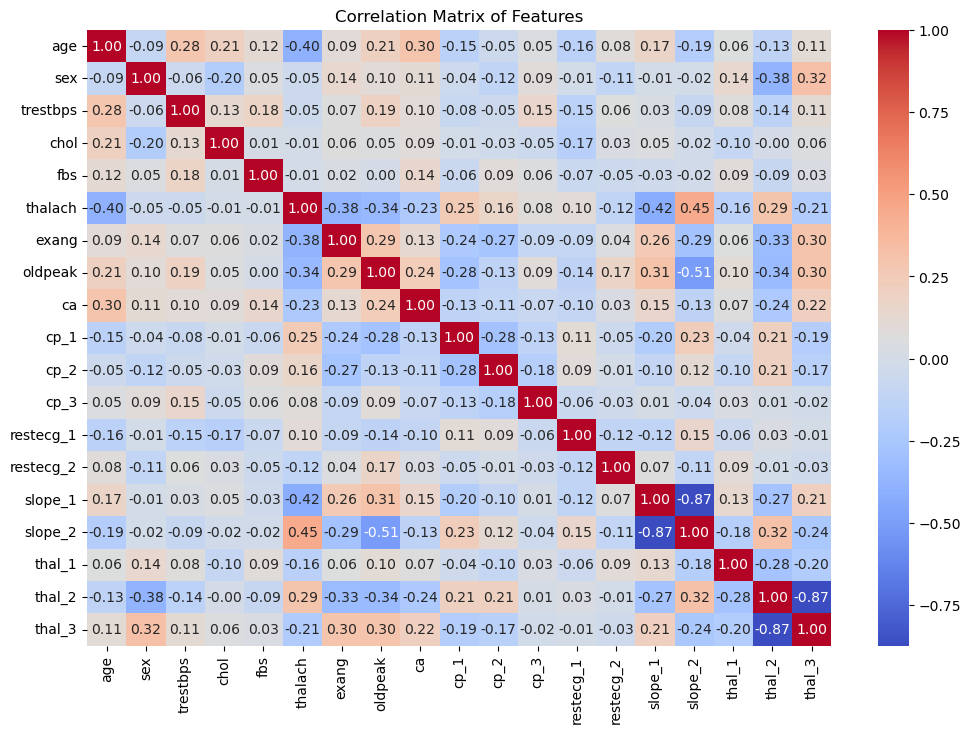

In [8]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# Features highly correlated with each other or target can be identified from the heatmap
# For simplicity, we'll proceed with all features as the dataset is small

# Train-Test Split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Define models and hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier()
}

In [11]:
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    'Decision Tree': {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    'Naive Bayes': {'var_smoothing': [1e-9, 1e-8, 1e-7]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [12]:
# Hyperparameter tuning using RandomizedSearchCV with cross-validation
best_models = {}
for name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], n_iter=10, cv=5, 
                                       scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best parameters for Decision Tree: {'min_samples_split': 5, 'max_depth': 5}
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


c:\Users\manas\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 7}
Best parameters for Naive Bayes: {'var_smoothing': 1e-08}


c:\Users\manas\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 1.0}
Best parameters for Neural Network: {'solver': 'sgd', 'hidden_layer_sizes': (100,), 'activation': 'tanh'}
Best parameters for XGBoost: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}


In [15]:
# Evaluate each model
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, "predict_proba") else None
    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    }

In [16]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance on Test Set:\n", results_df)


Model Performance on Test Set:
                      Accuracy  F1 Score  Precision    Recall   ROC AUC
Logistic Regression  0.776316  0.779221   0.731707  0.833333  0.881944
Decision Tree        0.789474  0.800000   0.727273  0.888889  0.804167
Random Forest        0.802632  0.810127   0.744186  0.888889  0.887500
Gradient Boosting    0.776316  0.790123   0.711111  0.888889  0.856250
SVM                  0.776316  0.790123   0.711111  0.888889  0.896528
KNN                  0.802632  0.810127   0.744186  0.888889  0.870139
Naive Bayes          0.789474  0.789474   0.750000  0.833333  0.830556
AdaBoost             0.789474  0.800000   0.727273  0.888889  0.857639
Neural Network       0.789474  0.789474   0.750000  0.833333  0.897222
XGBoost              0.776316  0.779221   0.731707  0.833333  0.852083


In [17]:
# Select the best model based on accuracy
best_model_name = results_df['Accuracy'].idxmax()
best_model = best_models[best_model_name]
print(f"\nThe best model is {best_model_name} with accuracy {results_df.loc[best_model_name, 'Accuracy']:.4f}")


The best model is Random Forest with accuracy 0.8026


In [18]:
# Pickle the best model
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler for future preprocessing
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)